In [1]:
# 1.

In [2]:
# 2.

In [3]:
# 3. Classical perceptron uses the step activation function, which is prone to problems for nonlinear dataset
# Change the function to sigmoid or softmax to make it equivalent to logistic regression

In [4]:
# 4. It has non zero gradients, which allow for training

In [5]:
# 5. Sigmoid, tanh, relu
# No

In [6]:
# 6. 
# a. 10 * batch_size
# b. 10x50, 3
# c. 50x3, 3
# d. 3
# e. Y = relu((relu(X*Wh + bh))*Wo + bo)

In [7]:
# 7. Depends on the activation function, 1(logistic) or 2(softmax). 
# For MNIST, 10 outputs of softmax
# For housing prices, 1 output without activation function

In [8]:
# 8. Backprop: computes gradients of all paramteres for each cost and updates using gradient descent
# reverse-mode autodiff: the part that computes the gradients

In [9]:
# 9. Learning rate, number of neurons, number of layers, activation function
# If overfit, reduce the number of layers or neurons

In [1]:
# 10. Deep MLP in MNIST
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [10]:
keras.__version__

'2.2.4-tf'

In [2]:
# Import MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_valid, X_train = X_train_full[:10000], X_train_full[10000:]
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]

In [4]:
# Scaling
X_valid = X_valid/255
X_train = X_train/255
X_test = X_test/255

In [6]:
# Model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=0.01),
             metrics=['accuracy'])

In [8]:
model.save('c10exercise.h5')

In [9]:
# Training - checkpoint at best validation error and early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

n_epochs = 200
checkpoint_cb = ModelCheckpoint('c10exercise.h5', save_best_only=True)
early_cb = EarlyStopping(patience=50, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 103us/sample - loss: 0.6348 - accuracy: 0.8353 - val_loss: 0.3253 - val_accuracy: 0.9111
Epoch 2/200
50000/50000 [==============================] - 4s 84us/sample - loss: 0.2976 - accuracy: 0.9143 - val_loss: 0.2634 - val_accuracy: 0.9251
Epoch 3/200
50000/50000 [==============================] - 4s 81us/sample - loss: 0.2453 - accuracy: 0.9295 - val_loss: 0.2255 - val_accuracy: 0.9365
Epoch 4/200
50000/50000 [==============================] - 4s 82us/sample - loss: 0.2103 - accuracy: 0.9390 - val_loss: 0.2018 - val_accuracy: 0.9410
Epoch 5/200
50000/50000 [==============================] - 4s 86us/sample - loss: 0.1836 - accuracy: 0.9477 - val_loss: 0.1784 - val_accuracy: 0.9488
Epoch 6/200
50000/50000 [==============================] - 4s 83us/sample - loss: 0.1632 - accuracy: 0.9528 - val_loss: 0.1654 - val_accuracy: 0.9521
Epoch 7/200
50000/50000 [========================

Epoch 55/200
50000/50000 [==============================] - 6s 110us/sample - loss: 0.0090 - accuracy: 0.9993 - val_loss: 0.0798 - val_accuracy: 0.9777
Epoch 56/200
50000/50000 [==============================] - 6s 114us/sample - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.0814 - val_accuracy: 0.9779
Epoch 57/200
50000/50000 [==============================] - 6s 125us/sample - loss: 0.0083 - accuracy: 0.9993 - val_loss: 0.0829 - val_accuracy: 0.9783
Epoch 58/200
50000/50000 [==============================] - 7s 132us/sample - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.0807 - val_accuracy: 0.9784
Epoch 59/200
50000/50000 [==============================] - 7s 145us/sample - loss: 0.0076 - accuracy: 0.9996 - val_loss: 0.0820 - val_accuracy: 0.9781
Epoch 60/200
50000/50000 [==============================] - 7s 132us/sample - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.0822 - val_accuracy: 0.9776
Epoch 61/200
50000/50000 [==============================] - 6s 125us/sample - loss: 0.00

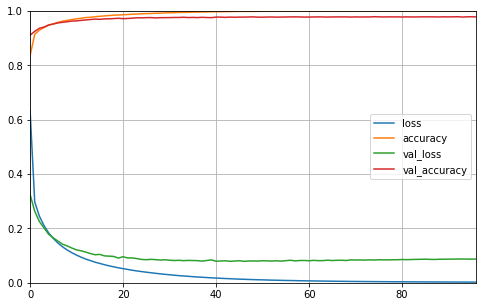

In [10]:
# Training plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
y_pred = model.predict_classes(X_test)

In [12]:
from sklearn.metrics import precision_score

precision_score(y_pred, y_test, average='macro')

0.9773924267908022